In [8]:
%matplotlib ipympl
from impedance.models.circuits.elements import element
from impedance.models.circuits import CustomCircuit
import numpy as np
import scipy
import matplotlib.pyplot as plt

C:\Users\admin\AppData\Local\Packages\PythonSoftwareFoundation.Python.3.10_qbz5n2kfra8p0\LocalCache\local-packages\Python310\site-packages\impedance\models\circuits\circuits.py:144: UserWarning: Simulating circuit based on initial parameters
  warnings.warn("Simulating circuit based on initial parameters")
C:\Users\admin\AppData\Local\Packages\PythonSoftwareFoundation.Python.3.10_qbz5n2kfra8p0\LocalCache\local-packages\Python310\site-packages\impedance\models\circuits\circuits.py:144: UserWarning: Simulating circuit based on initial parameters
  warnings.warn("Simulating circuit based on initial parameters")
C:\Users\admin\AppData\Local\Packages\PythonSoftwareFoundation.Python.3.10_qbz5n2kfra8p0\LocalCache\local-packages\Python310\site-packages\impedance\models\circuits\circuits.py:144: UserWarning: Simulating circuit based on initial parameters
  warnings.warn("Simulating circuit based on initial parameters")
C:\Users\admin\AppData\Local\Packages\PythonSoftwareFoundation.Python.3.10_q

 message: Desired error not necessarily achieved due to precision loss.
 success: False
  status: 2
     fun: 7.41397298574773e-06
       x: [ 1.000e-03  9.996e-01]
     nit: 19
     jac: [-1.511e+00 -4.163e-02]
    nfev: 243
    njev: 75
 allvecs: [array([ 1.000e+00,  1.000e+00]), array([ 1.964e-01,  1.844e-01]), array([ 1.851e-01,  1.740e-01]), array([ 7.709e-02,  1.450e-01]), array([ 6.576e-02,  1.445e-01]), array([ 3.869e-02,  1.658e-01]), array([ 2.654e-02,  1.869e-01]), array([ 1.905e-02,  2.109e-01]), array([ 1.157e-02,  2.609e-01]), array([ 7.916e-03,  3.089e-01]), array([ 1.450e-03,  7.506e-01]), array([ 1.710e-03,  7.875e-01]), array([ 1.336e-03,  1.055e+00]), array([ 9.456e-04,  1.101e+00]), array([ 9.317e-04,  1.101e+00]), array([ 9.286e-04,  1.101e+00]), array([ 9.280e-04,  1.101e+00]), array([ 9.688e-04,  1.097e+00]), array([ 9.909e-04,  1.001e+00]), array([ 1.000e-03,  9.996e-01])]


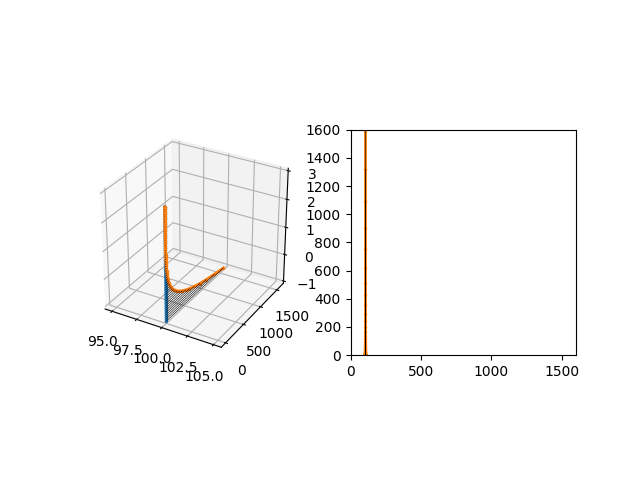

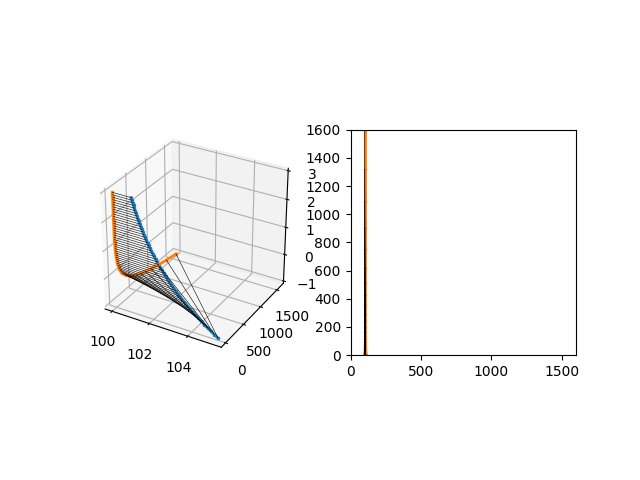

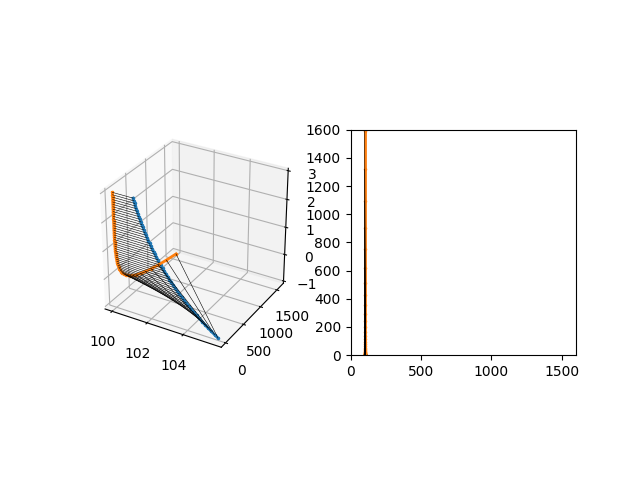

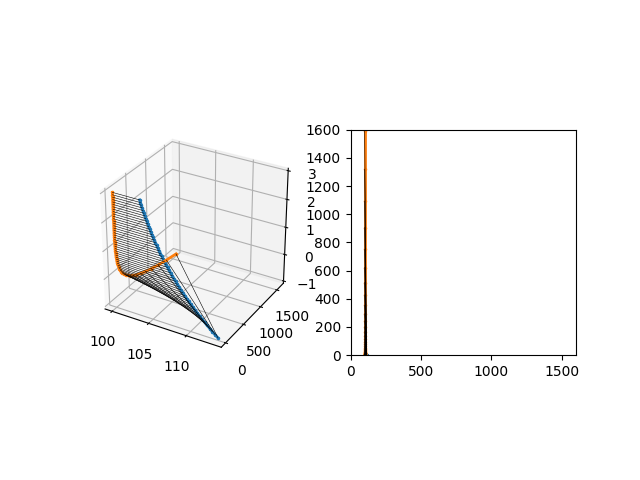

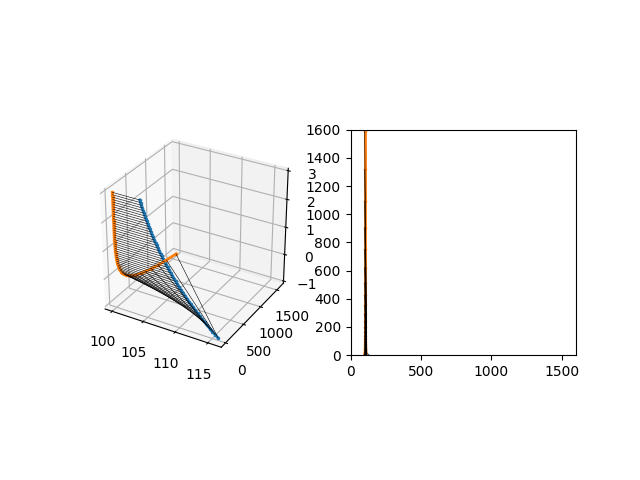

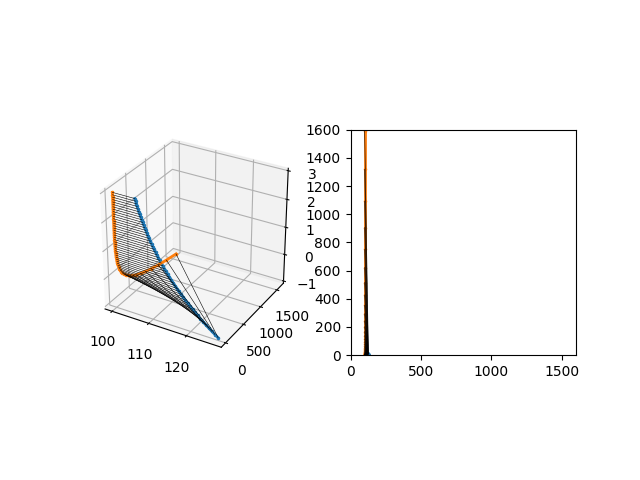

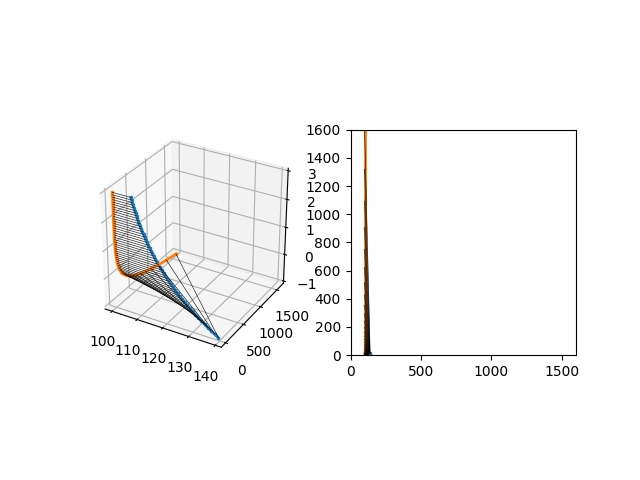

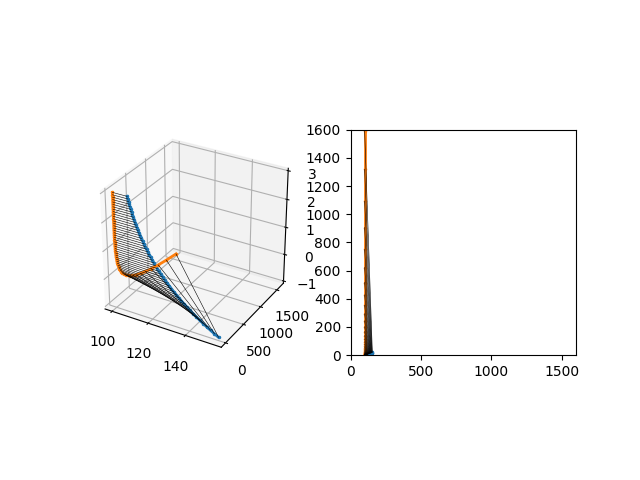

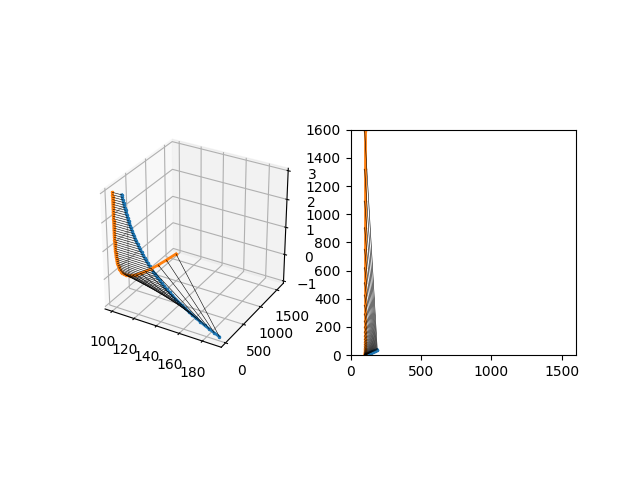

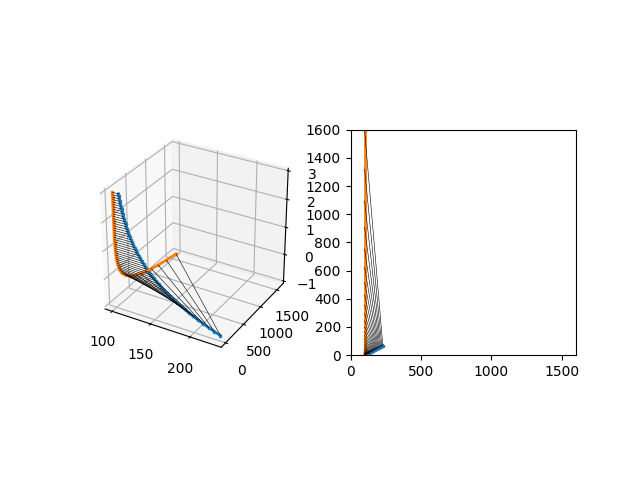

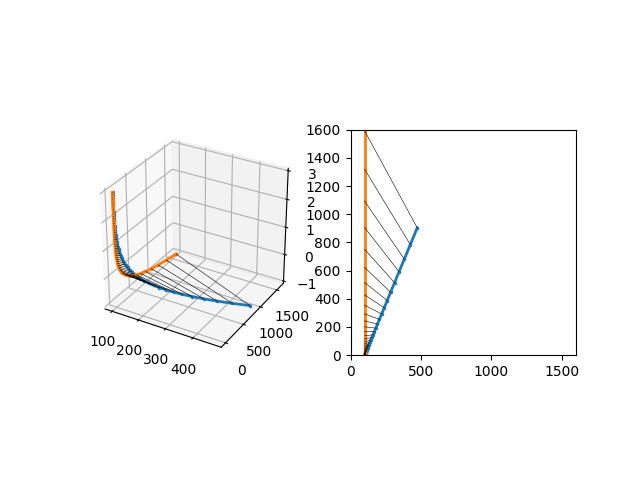

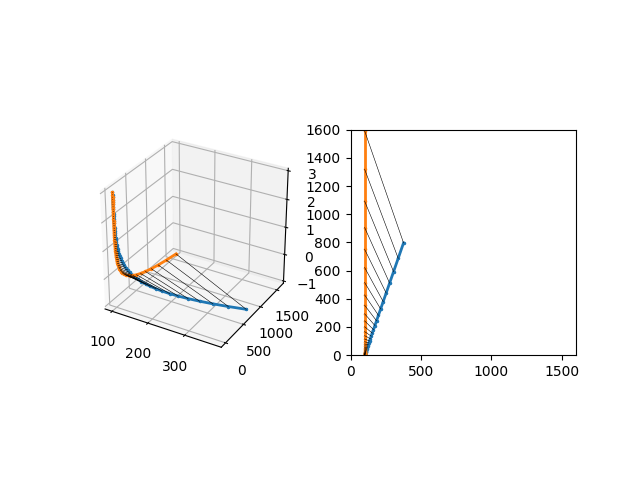

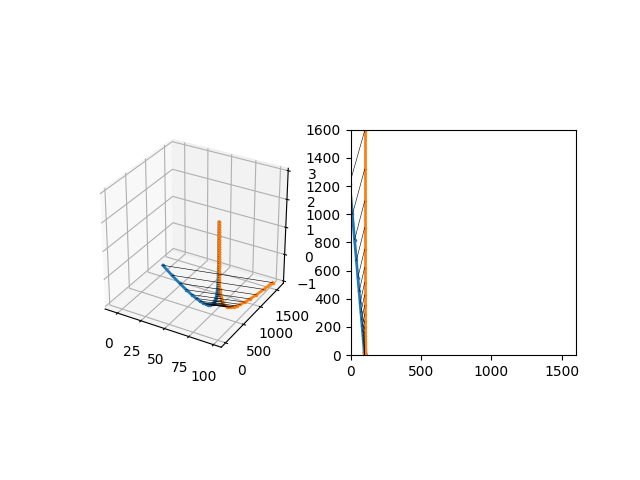

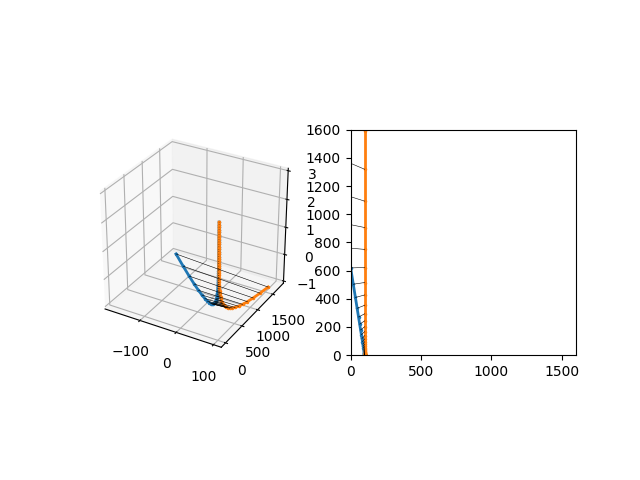

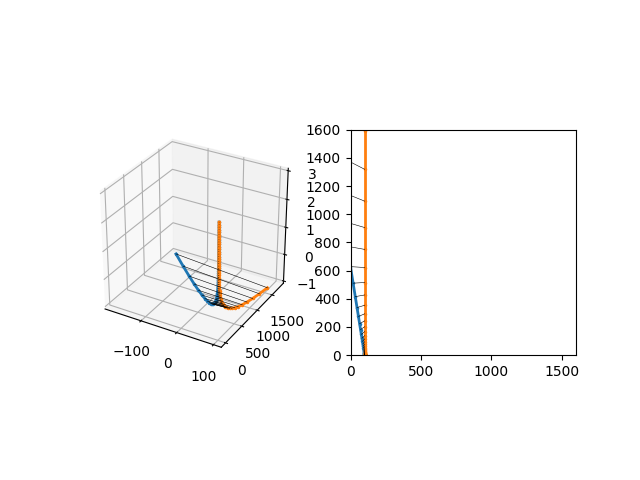

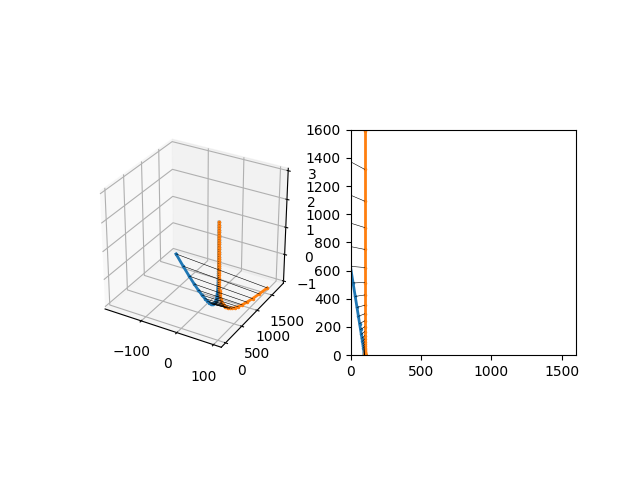

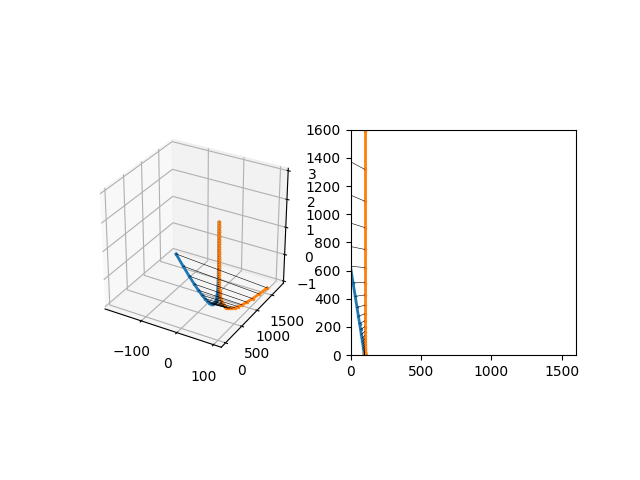

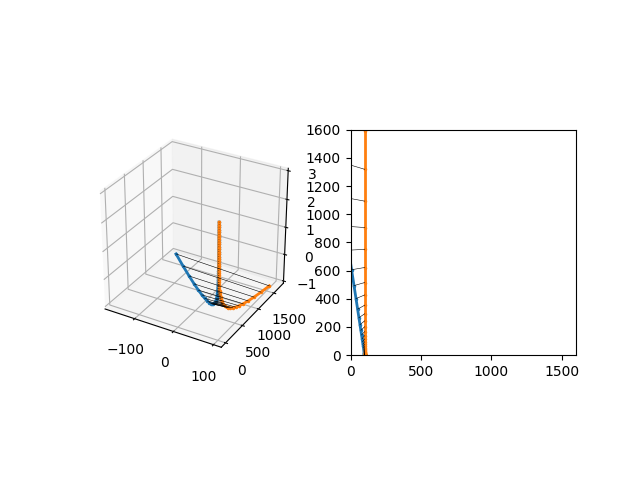

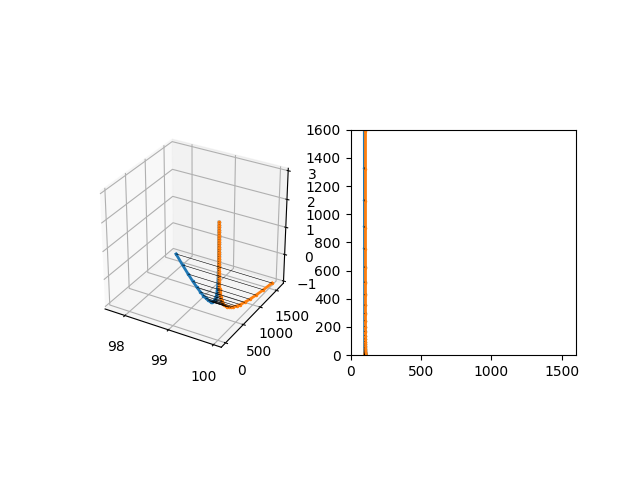

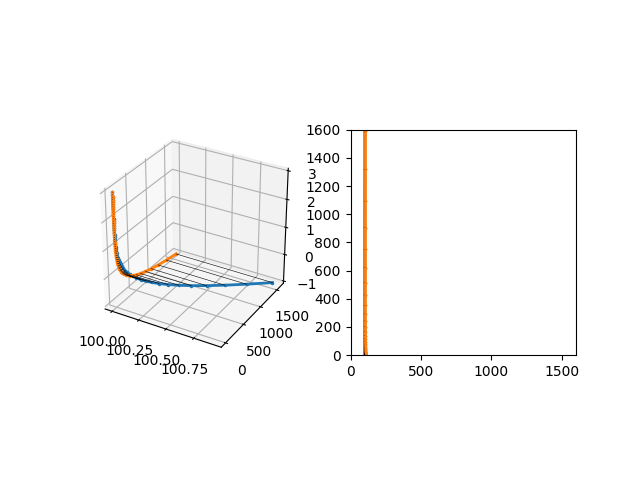

In [14]:
freq_list=np.logspace(-1,3,50)
circuit="R_1-CPE_1"
c = CustomCircuit(initial_guess=[1e-3,1],circuit=circuit,constants={"R_1":100})
z_exp=c.predict(frequencies=freq_list)

from scipy.optimize import minimize, least_squares


omega=2*np.pi*freq_list

def fun(params,omega,z_exp,weights):
    # R=params[0]
    Q=params[0]
    alpha=params[1]
    # R0=100 
    # C0=1e-3
    # R0=1 
    # C0=1
    chi_total=0
    for w,z,wt in zip(omega,z_exp,weights):
        c = CustomCircuit(initial_guess=[Q,alpha],circuit=circuit,constants={"R_1":100})
        z_model=c.predict(frequencies=[w/(2*np.pi)])
        chi_real=(np.real(z_model)-np.real(z))**2/wt**2
        chi_imag=(np.imag(z_model)-np.imag(z))**2/wt**2
        chi_total+=(chi_real+chi_imag)

    return chi_total

## weighing ##
wt=np.abs(z_exp)
# wt=np.ones(len(z_exp))
# wt=omega

result=minimize(fun,(1,1),args=(omega,z_exp,wt),method="CG",options={'return_all': True})
print(result)

# result2=least_squares(fun,(100,2e-3),args=(omega,z_exp,wt))


# cc = CustomCircuit(initial_guess=[result.x[0],result.x[1]],circuit=circuitrq,constant={"R_1":100})
# z_fit = cc.predict(frequencies=freq_list)



for sol in result.allvecs:
    cc = CustomCircuit(initial_guess=[sol[0],sol[1]],circuit=circuit,constants={"R_1":100})
    z_fit = cc.predict(frequencies=freq_list)   
    fig=plt.figure()
    ax1=fig.add_subplot(121,projection="3d")
    ax2=fig.add_subplot(122)
    ax1.set_box_aspect([1,1,1])
    # ax1.set_xlim(0,100)
    # ax1.set_ylim(0,100)
    ax2.set_xlim(0,1600)
    ax2.set_ylim(0,1600)
    ax2.set_aspect("equal")
    ax1.plot(np.real(z_fit),-np.imag(z_fit),np.log10(freq_list),".",ms=3,linestyle="-",label="Fit",linewidth=2)
    ax1.plot(np.real(z_exp),-np.imag(z_exp),np.log10(freq_list),".",ms=3,linestyle="-",label="Exp",linewidth=2)
    ax2.plot(np.real(z_fit),-np.imag(z_fit),".",ms=3,linestyle="-",label="Fit",linewidth=2)
    ax2.plot(np.real(z_exp),-np.imag(z_exp),".",ms=3,linestyle="-",label="Exp",linewidth=2)
    for p1,p2,f in zip(z_exp,z_fit,freq_list):
        ax1.plot([np.real(p1),np.real(p2)],[-np.imag(p1),-np.imag(p2)],[np.log10(f),np.log10(f)],color="black",linestyle="-",linewidth=0.4)
        ax2.plot([np.real(p1),np.real(p2)],[-np.imag(p1),-np.imag(p2)],color="black",linestyle="-",linewidth=0.4)